#The dataset carData.csv  has used car details and is from cardheko.com. Develop a Regression model to predict the price of any car, given the values of important features.

The below code is a comprehensive approach for predicting the 'selling price' of a car (using the carData.csv dataset) based on its name, transmission, fuel type, year, and kilometers driven using a linear regression model. It includes data exploration, feature selection, feature engineering, data preprocessing, model training, evaluation, and visualization.Here's a breakdown of the code:
#**Imported Libraries:**
**pandas:** Data manipulation and analysis library \
**numpy:** Numerical operations library \
**seaborn:** Data visualization library \
**matplotlib.pyplot:** Plotting library \
**train_test_split:** Data splitting for training and testing \
**LinearRegression:** Linear regression model implementation \
**OneHotEncoder:** Preprocessing categorical data before using it with machine learning algorithms.
#**Data Loading:**
**car_data:** Path to the car_data.csv file \
**df = pd.read_csv(car_data):** Reads the CSV file into a Pandas DataFrame
#**Data Exploration:**
**df.head():** Displays the first few rows of the DataFrame \
**df.info():** Provides an overview of the DataFrame's structure and data types \
**df.describe():** Generates descriptive statistics for numerical columns \
**df.columns:** Lists the column names of the DataFrame
#**Data Visualization:**
**sns.pairplot(df):** Creates a matrix of scatterplots for all pairs of numerical columns \
**sns.displot(df['Owner']):** Visualizes the distribution of the 'Owner' column using a histogram \
**sns.heatmap(df.corr()):** Generates a heatmap to visualize correlations between columns
#**One-hot Encoding for Categorical Features:**
**ohe = OneHotEncoder(handle_unknown='ignore'):** Initializes an OneHotEncoder object to handle categorical features. \
**X_categorical = df[['name', 'transmission', 'fuel']]:** Extracts the categorical features. \
**X_encoded = ohe.fit_transform(X_categorical).toarray():** Encodes the categorical features using one-hot encoding. \
**X = np.concatenate((X_encoded, df[['year', 'km_driven']]values), axis=1):** Concatenates the encoded categorical features with numerical features.
#**Feature Selection, Feature Engineering and Data Splitting:**
**features = ['name', 'transmission', 'fuel', 'year', 'km_driven']:** Selects the relevant features as predictors. \
**X = df[features]:** Extracts the selected features from the DataFrame. \
**y = df['selling_price']:** Defines the target variable to predict. \
**X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101):** Splits the data into training and testing sets with a 70:30 ratio
#**Linear Regression Modeling:**
**lm = LinearRegression():** Initializes a LinearRegression model \
**lm.fit(X_train, y_train):** Trains the model using the training data \
**print(lm.intercept_):** Prints the intercept value of the model
#**Model Evaluation:**
**predictions = lm.predict(X_test):** Predicts the 'Owner' values for the test data. \
**plt.scatter(y_test, predictions):** Creates a scatterplot comparing actual 'Owner' values to predicted values.\
**sns.distplot((y_test-predictions),bins=50):** Visualizes the distribution of the prediction errors

#An error was faced by me, and I resolved it as follows:
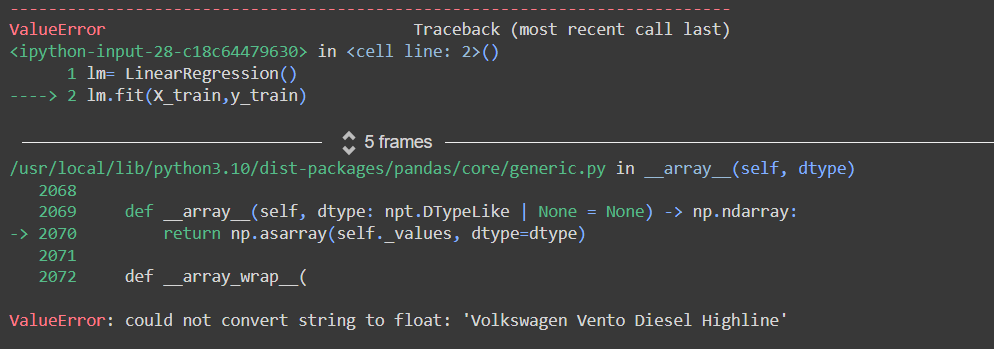
#NOTE:
"**ValueError: could not convert string to float: 'Volkswagen Vento Diesel Highline'**" occurs because the linear regression model expects numerical values for all features. The feature 'name' in car_data dataset contains categorical values, such as car models and their variants. To address this issue, we'll need to encode the categorical features before feeding them into the linear regression model.There are two common approaches to encoding categorical features: \
**Label Encoding** \
**One-Hot Encoding:** Create a separate binary feature for each unique category. For example, there would be a feature for 'Volkswagen Vento Diesel Highline', 'Toyota Corolla Altis 1.6G', and so on, with each feature being either 0 or 1 depending on whether the car model matches that category.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
car_data = "/content/car_data.csv"

In [ ]:
df = pd.read_csv(car_data)

In [ ]:
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

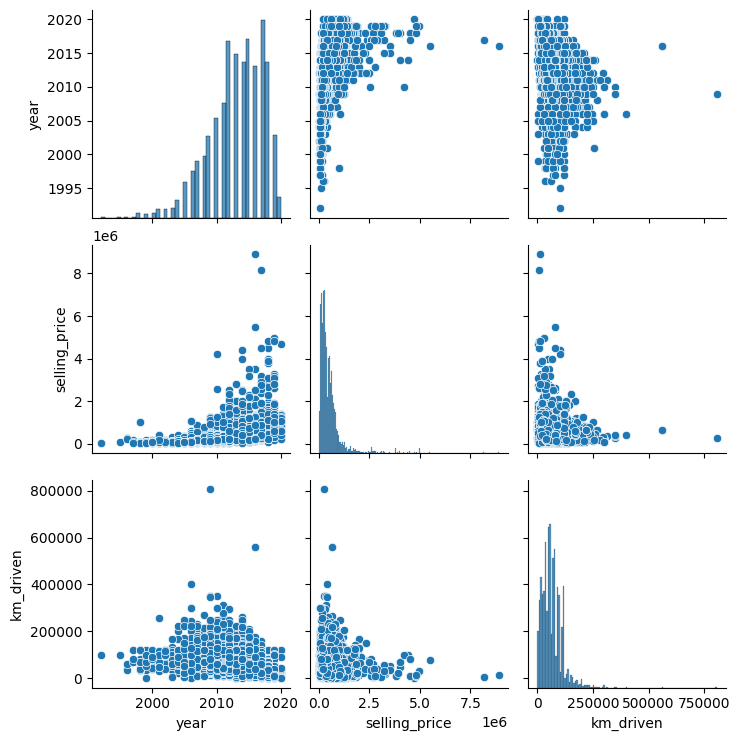

In [ ]:
sns.pairplot(df)

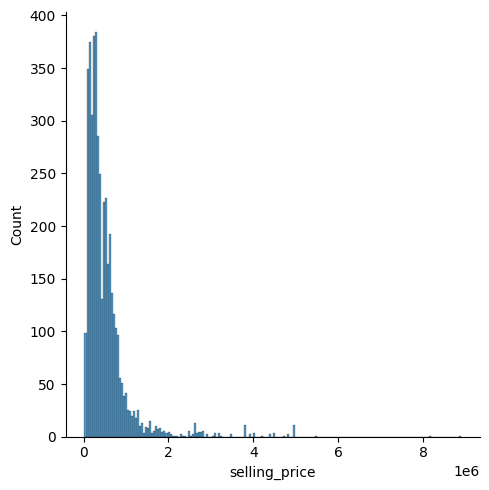

In [ ]:
sns.displot(df['selling_price'])

<ipython-input-47-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

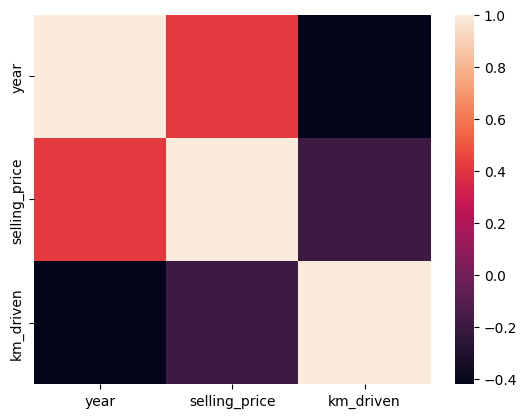

In [ ]:
sns.heatmap(df.corr())

In [ ]:
features = ['name', 'transmission', 'fuel', 'year', 'km_driven']
X = df[features]
y = df['selling_price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_categorical = df[['name', 'transmission', 'fuel']]
X_encoded = ohe.fit_transform(X_categorical).toarray()
X = np.concatenate((X_encoded, df[['year', 'km_driven']].values), axis=1)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

47744771972.90133


In [ ]:
predictions = lm.predict(X_test)

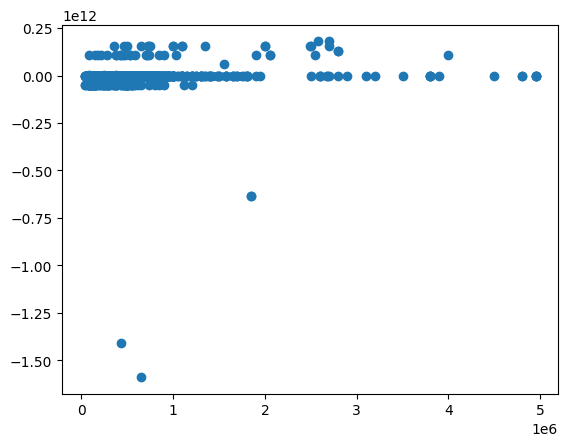

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-62-34796ad77530>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


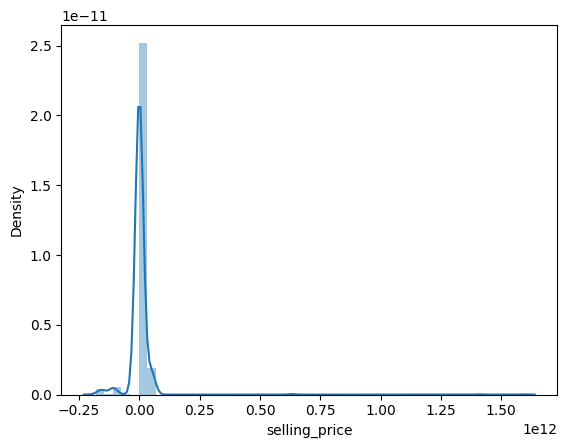

In [ ]:
sns.distplot((y_test-predictions),bins=50)
plt.show()